# A network from another journal: The International Migration Review (1966-2015)

After a fair bit of confusion about the difference between the _International Migration_ (IM, produced by Wiley) and the _International Migration Review_ (IMR, produced by Sage), we decided that the IM journal was best suited for our discourse coalition analysis, but that IMR would be very well suited for a comparison. We harvested a title list (see other notebook), but as the IMR (contrary to IM) was completely full-text online, there was an opportunity to analyse the editors (and the board of editors).

In this notebook we analyse the editors as a network. This is a mix of manual elaboration of a cut-and-pastes from the journals and some automatic normalizations; making the results a lot quicker but also noisier. We did not sample each year, but each 4th year, as this reduced the amount of manual work and because for getting an impression of the editorial network and dynamics, this seemed adequate. 

The first bit of code is elaborating the raw text, which we wrote back, so it is no longer relevant. Before that, we did some manual editing and search-and-replacing (not documented but aimed at halfway normalizing and structuring the text). Reading the text now gives back the result of the first work.

In [ ]:
with open('../data/imr_editors.txt') as infile:
    txt = infile.read()

## Cleaning and structuring

the following is a manual reworking of the text and the starting point for the analysis

In [195]:
ntxt = [{'year':1966,
'Editor ': ['Silvano M. Tomasi'],
'Associate_Editor': ['Lidio U. Bertelli'],
'Book_Review_Editor': ['Vincent Tomes'],
'Board_of_Directors': [' Juvenal Marchisio', 'Caesar Donanzan', 'Daniel Zanon', 'Joseph Cogo'],
'Advisory_Editors: ': ['Simon Abbott, The Institute of Race Relation (London)', 'Fernando Bastos de Avila, Pontifical Catholic University, (Rio de Janeiro)', 'Gunther Beijer, International Migration (The Hague)', 'William S. Bernard, American Committee for Nationalities Service (New York)', 'Anthony T. Bouscaren, Le Moyne College, (Syracuse, N.Y.)', 'Robert D. Cross, Columbia University (New York)', 'Samuel N. Eisenstadt, The Hebrew University (Jerusalem)', 'Joseph P. Fitzpatrick, Committee for Research on Migration, Fordham University (N.Y.)', 'J. R. Gaynor, LCM.C, (Wellington)', 'Andrew M. Greeley, National Opinion Research Center, University of Chicago (Chicago)', 'Everett S. Lee, University of Massachusetts (Amherst)', 'Giuseppe Lucrezio Monticelli, U.C.E.I. (Rome)', 'Ruth Murphy, American Immigration and Citizenship Conference (New York)', 'Antonio Perotti, Centro Studi Emigrazione (Rome)', 'Charles A. Price, Australian National University (Camberra)', 'Alan Richardson, University of Western Australia (Nedlands)', 'Giovanni B. Sacchetti, Centro Studi Emigrazione (Rome)', 'Clarence Senior, Board of Education (New York)', 'Tadeusz Stark, International Catholic Migration Commission (Geneva)', 'Rudolph J. Vecoli, University of Illinois (Champaign)', 'Arthur M. J. Verthe, Ambassadeur (Brussels)']},
{'year':1969,
'Editor': ['Sylvan M. Tomasi'],
'Review_of_Reviews_Editors: ': ['Lydio F. Tomasi', 'Charles B. Keely'],
'Book_Reviews_Editor: ': ['Dean Cinel'],
'Editorial_Board: ': ['Madeline H. Engel, (Sociology)', 'Herbert H. Lehman College, City University of New York', 'Oleh S. Fedyshyn, (Political Sciences)', 'Richmond College, City University of New YorkVincent J. Tomes, (History)', 'Georgean Court College, N.J.', 'Michael G. Wenk, (International Law)', 'Department of Immigration, U.S.C.C.'],
'Board_of_Directors ': ['Edward E. Swanstrom (Chairman)', 'Juvenal Marchisio, Caesar Donanzan, Salvatore De Vita, John McCarthy, Joseph Cogo.'],
'Advisory_Editors: ': ['Simon Abbott, The Institute of Race Relation (London)', 'Fernando Bastos de Avila, Pontifical Catholic University, (Rio de Janeiro)', 'Gunther Beijer, Editor, International Migration, (The Hague)', 'William S. Bernard, Center for Migration Studies, Brooklyn College, (N.Y.)', 'Anthony T. Bouscaren, Le Moyne College, (Syracuse, N.Y.)', 'L. A. Martinez Cachero, Facultad de Ciencias Politicas (Madrid)', 'Robert D. Cross, Columbia University (New York)', 'Samuel N. Eisenstadt, The Hebrew University (Jerusalem)', 'Joseph P. Fitzpatrick, Committee for Research on Migration, Fordham University (N.Y.)', 'Andrew M. Greeley, National Opinion Research Center, University of Chicago (Chicago)', 'Everett S. Lee, University of Massachusetts (Amherst)', 'Giuseppe Lucrezio Monticelli, U.C.E.I. (Rome)', 'Ruth Murphy, American Immigration and Citizenship Conference (New York)', 'James J. Norris, CRS-U.S. Catholic Conference Antonio Perotti, Centro Studi Emigrazione (Rome)', 'Charles A. Price, Australian National University (Canberra)', 'Alan Richardson, University of Western Australia (Nedlands)', 'Anthony H. Richmond, York University (Toronto)', 'Giovanni B. Sacchetti, Centro Studi Emigrazione (Rome)', 'Clarence Senior, Board of Education (New York)', 'Tadeusz Stark, International Catholic Migration Commission (Geneva)', 'Rudolph J. Vecoli, Immigration Center, University of Minnesota (Minneapolis)']},
{'year':1972,
'Editor: ': ['SYLVAN M. TOMASI'],
'Legislation_Editors: ': ['DONALD G. HOHL', 'MICHAEL G. WENK, Migration and Refugee Affairs, U.S.C.C.'],
'Review_of_Reviews_Editors: ': ['LYDIO F. TOMASI, Center for Migration Studies, N.Y.', 'CHARLES B. KEELY, Western Michigan University', 'ANNA M. BIRINDELLI, C.I.S.P., Rome.'],
'Book_Review_Editor ': ['ELEANOR ROGG, Wagner College.'],
'Editorial_Board: ': ['WILLIAM S. BERNARD, Center for Migration Studies, Brooklyn College', 'MADELINE H. ENGEL, Herbert H. Lehman College, City University of N.Y.', 'PHILIP KAYAL,Senton Hall University', 'AUSTIN T.FRAGOMEN Jr., New York', 'JOHN MACISCO, Georgetown University'],
'Board_of_Directors ': ['EDWARD E. SWANSTROM (Chairman)', 'JOSEPH COGO', 'JUVENAL MARCHISIO', 'JOHN McCARTHY', 'PETER SORDI', 'JOSEPH SPIGOLON.'],
'Advisory_Editors: ': ['SIMON ABBOTT, The Institute of Race Relations, London', 'FERNANDO BASTOS de AVILA, Pontifical Catholic University, Rio de Janeiro', 'GUNTHER BEIJER, Editor, International Migration, The Hague', 'ANTHONY T. BOUSCAREN, Le Moyne College, Syracuse, N.Y.', 'L. A. MARTINEZ CACHERO, Facultad de Ciencias Politicas, Madrid', 'FRANCESCO CERASE, University of Rome', 'ROBERT D. CROSS, Swarthmore College Pennsylvania', 'MICHAEL N. CUTSUMBIS, Marietta College, Ohio. DALE S. DE HAAN, Counsel, U.S. Senate, Judiciary, Sub-Committee on Refugees', 'SAMUEL N. EISENSTADT, The Hebrew University, Jerusalem', 'JOSEPH P. FITZPATRICK, Committee for Research on Migration, Fordham University, N.Y.', 'ANDREW M. GREELEY, National Opinion Research Center, University of Chicago', 'EVERETT S. LEE, University of Georgia', 'RUTH MURPHY, American Immigration and Citizenship Conference, N.Y.', 'JAMES J. NORRIS, C.R.S.', 'U.S.C.C.', 'CHARLES A. PRICE, Australian National University, Canberra', 'ALAN RICHARDSON, University of Western Australia, Nedlands', 'ANTHONY H. RICHMOND, York University, Toronto', 'GIOVANNI B. SACCHETTI, Centro Studi Emigrazione, Rome', 'TADEUSZ STARK, International Catholic Migration Commission, Geneva', 'RUDOLPH J. VECOLI, Center for Immigration Studies, University of Minnesot']},
{'year':1976,
'Editor': ['SYLVAN M. TOMASI'],
'Managing_Editor: ': ['LYDIO F. TOMASI, Center for Migration Studies, N.Y.'],
'Book_Review_Editor ': ['PHILIP M. KAYAL, Seton Hall University'],
'Editorial_Board: ': ['AUSTIN T. FRAGOMEN, JR., Esq., N.Y.', 'MONICA BOYD, Carleton University', 'PHILIP GLEASON, University of Notre Dame', 'DONALD F. HEISEL, The Population Council, N.Y.', 'DONALD G. HOHL, Migration & Refugee Affairs, U.S.C.C.', 'CHARLES B. KEELY, Fordham University', 'C. MICHAEL LANPHIER, York University, Toronto', 'JOHN J. MACISCO, JR., Fordham University', 'EVA SANDIS, Fordham University', 'MICHAEL G. WENK, Washington, D.C. #Board_of_Directors# : EDWARD E. SWANSTROM (Chairman)', 'JOSEPH COGO', 'JOHN McCarthy', 'Joseph spigolon', 'joseph preite'],
'Advisory_Editors: ': ['SIMON ABBOTT, London Council of Social Service', 'IVO BAUCIC, Center for Migration Studies, University of Zagreb', 'GUNTHER BEIJER, Editor, International Migration, The Hague', 'RUTH Z. CASSELMAN, American Immigration & Citizenship Conference', 'RAMIRO CARDONA, Centro Regional de Poblacion, Bogota', 'FRANCESCO CERASE, University of Rome', 'ROBERT D. CROSS, University of Virginia', 'MICHAEL N. CUTSUMBIS, Marietta College, Ohio', 'DALE S. DE HAAN, Counsel U.S. Senate, Judiciary, Sub-Committee on Refugees', 'SAMUEL N. EISENSTADT, The Hebrew University, Jerusalem', 'JOSEPH P. FITZPATRICK, Committee for Research on Migration, Fordham University, N.Y.', 'ANDREW M. GREELEY, National Opinion Research Center, University of Chicago', 'EVERETT S. LEE, University of Georgia', 'JAMES J. NORRIS, C.R.S.', 'U.S.C.C.', 'CHARLES A. PRICE, Australian National University, Canberra', 'ALAN RICHARDSON, University of Western Australia, Ned- lands', 'ANTHONY H. RICHMOND, York University, Toronto', 'GIOVANNI B. SACCHETTI, Centro Studi Emigrazione, Rome', 'TADEUSZ STARK, International Catholic Migration Commission, Geneva', "GEORGES P. TAPINOS, Intitut National d'Etudes Demographiques, Paris", 'RUDOLPH J. VECOLI, Center for Immigration Studies, University of Minnesota']},
{'year':1980,
'Editor': ['SYLVANo M. TOMASI'],
'Managing_Editor: ': ['LYDIO F. TOMASI, Center for Migration Studies, N.Y.'],
'Book_Review_Editor ': ['ELEANOR M. ROGG, Hispanic Research Center and Wagner College'],
'Editorial_Board: ': ['AUSTIN T. FRAGOMEN, JR., Esq., N.Y.', 'MONICA BOYD, Carleton University', 'PHILIP GLEASON, University of Notre Dame', 'DONALD F. HEISEL, Population Division, U.N.', 'DONALD G. HOHL, Migration & Refugee Affairs, U.S.C.C.', 'CHARLES B. KEELY, The Population Council, N.Y.', 'C. MICHAEL LANPHIER, York University, Toronto', 'JOHN J. MACISCO, JR., Fordham University', 'EVA SANDIS, Fordham University', 'MICHAEL G. WENK, Washington, D.C. #Board_of_Directors# : EDWARD E. SWANSTROM (Chairman)', 'JOSEPH COGO', 'JOHN MCCARTHY', 'SYLVAN M. TOMASI', 'JOSEPH PREITE'],
'Advisory_Editors: ': ['SIMON ABBOTT, London Council of Social Service', 'IVO BAUCIC, Center for Migration Studies, University of Zagreb', 'GUNTHER BEIJER, Editor, International Migration, The Hague', 'RUTH Z. CASSELMAN, American Immigration & Citizenship Conference', 'RAMIRO CARDONA, Centro Regional de Poblacion, Bogota', 'FRANCESCO CERASE, University of Rome', 'ROBERT D. CROSS, University of Virginia', 'MJCHAEL N. CUTSUMBIS, Marietta College, Ohio', 'DALE S. DE HAAN, United Nations HighCommission for Refugees, Geneva', 'SAMUEL N. EISENSTADT, The Hebrew University, Jerusalem', 'JOSEPH P. FITZPATRICK, Committee for Research on Migration, Fordham University, N.Y.', 'ANDREW M. GREELEY, National Opinion Research Center, University of Chicago', 'EVERETT S. LEE, University of Georgia', 'CHARLES A. PRICE, Australian National University, Canberra', 'ALAN RICHARDSON, University of Western Australia, Nedlands', 'ANTHONY H. RICHMOND, York University, Toronto', 'GIOVANNI B. SACCHETTI, Centro Studi Emigrazione, Rome', "GEORGES P. TAPINOS, Institut National d'Etudes Demographiques, Paris", 'RUDOLPH J. VECOLI, Immigration History Research Center, University of Minnesota']},
{'year':1984,
'Editor': ['SILVANO M. TOMASI'],
'Managing_Editor: ': ['LYDIO F. TOMASI'],
'Assistant_Editors: ': ['MARK J. MILLER', 'MAGGIE SULLIVAN'],
'Book_Review_Editor ': ['ELEANOR M. ROGG, Wagner College'],
'Editorial_Board: ': ['ROBERT L. BACH, State University of New York at Binghamton', 'MONICA BOYD, Carleton University', 'AUSTIN T. FRAGOMEN, Jr., Esq., N.Y.', 'DONALD F. HEISEL, Population Division, U.N.', 'DONALD G. HOHL, Migration and Refugee Affairs, U.S.C.C.', 'CHARLES B. KEELY, The Population Council, N.Y.', 'MARY M. KRITZ, Population Science, The Rockefeller Foundation', 'C. MICHAEL LANPHIER, York University, Toronto', 'JOHN J. MACISCO, Jr., Fordham University', 'MARK J. MILLER, University of Delaware', 'ALEJANDRO PORTES, Johns Hopkins University.'],
'Advisory_Editors: ': ['R.T. APPLEYARD, The University of Western Australia', 'W.R. BOEHNING, International Migration for Employment, ILO, Geneva', 'IVO BAUCIC, Center for Migration Studies of Zagreb', 'BARRY CHISWICK, Department of Economics, University of Illinois at Chicago', 'JOSEPH FITZPATRICK, Committee for Research on Migration, Fordham University', 'ANDREW M. GREELEY, National Opinion Research Center, University of Chicago', 'LASZEK A. KOSINSKI, University of Alberta, Canada', 'GILBERT JAEGER, Bruxelles', 'CHRISTOPHER MITCHELL, N.Y.U. Center for Latin American and Caribbean Studies', 'CHARLES A. PRICE, Australian National University, Canberra']},
{'year':1988,
'Editor: ': ['SILVANO M. TOMASI'],
'Managing_Editor: ': ['LYDIO F. TOMASI'],
'Assistant_Editors: ': ['MAGGIE SULLIVAN', 'MARK J. MILLER'],
'Book_Review_Editor ': ['ELEANOR M. ROGG, Wagner College'],
'Review_of_Reviews_Editors: ': ['EILEEN REITER','GRAZIANO BATTISTELLA'],
'Editorial_Board: ': ['ROBERT L. BACH, State University of New York at Binghamton', 'MONICA BOYD, Carleton University', 'DALE S. de HAAN, Immigration and Refugee Program, W.C.S.', 'AUSTIN T. FRAGOMEN, Jr., Esq., N.Y.', 'DONALD F. HEISEL, Population Division, U.N.', 'DONALD G. HOHL, Migration and Refugee Affairs, U.S.C.C.', 'CHARLES B. KEELY, The Population Council, N.Y.', 'MARY M. KRITZ, Population Science, The Rockefeller Foundation', 'C. MICHAEL LANPHIER, York University, Toronto', 'JOHN J. MACISCO, Jr., Fordham University', 'ALEJANDRO PORTES, Johns Hopkins University.'],
'Advisory_Editors: ': ['R.T. APPLEYARD, The University of Western Australia', 'W.R. BOEHNING, International Migration for Employment, ILO, Geneva', 'IVO BAUCIC, University of Split, Yugoslavia', 'BARRY CHISWICK, Department of Economics, University of Illinois at Chicago', 'JOSEPH FITZPATRICK, Committee for Research on Migration, Fordham University', 'ANDREW M. GREELEY, National Opinion Research Center, University of Chicago', 'LASZEK A. KOSINSKI, University of Alberta, Canada', 'GILBERT JAEGER, Bruxelles', 'CHRISTOPHER MITCHELL, N.Y.U. Center for Latin American and Caribbean Studies', 'CHARLES A. PRICE, Australian National University, Canberra', 'ANTHONY H. RICHMOND, York University, Toronto', 'GIANFAUSTO ROSOLI, Centro Studi Emigrazione-Rome', 'RUDOLPH J. VECOLI, Immigration History Research Center, University of Minnesota']},
{'year':1992,
'Editor': ['SILVANO M. TOMASI'],
'Managing_Editor ': ['LYDIO F. TOMASI'],
'Assistant Editor': ['MARK J. MILLER'],
'Book_Review_Editor ': ['ELEANOR M. ROGG'],
'Review of Reviews Editor ': ['EILEEN REITER'],
'Editorial_Board ': ['THOMAS J. ARCHDEACON', 'ROBERT L. BACH', 'GEORGE J. BORJAS', 'MONICA BOYD', 'ROGERS BRUBAKER', 'DALE S. de HAAN', 'AUSTIN T FRAGOMEN Jr.', 'DONALD F. HEISEL', 'CHARLES B. KEELY', 'MARY M. KRITZ', 'C. MICHAEL LANPHIER', 'JOHN J. MACISCO, Jr.', 'DAVID A. MARTIN', 'RICHARD RYSCAVAGE', 'ALAN B. SIMMONS', 'MARTA TIENDA', 'ARISTIDE R. ZOLBERG'],
'Advisory_Editors ': ['ADERANTIADEPOJU', 'R.T.APPLEYARD', 'JORGE BALAN', 'W.R. BOEHNING', 'IVO BAUCIC', 'JOSEPH CHAMIE', 'BARRY CHISWICK', 'JOSEPH FITZPATRICK', 'ANDREW M. GREELEY', 'GRAEME HUGO', 'GILBERT JAEGER', 'LASZEK A. KOSINSKI', 'APRODICIO A. LAQUIAN', 'IVAN LIGHT', 'LIN LEAN LIM', 'PHILIP L MARTIN', 'URSULA MEHRLANDER', 'CHRISTOPHER MITCHELL', 'CHARLES A. PRICE', 'GIANFAUSTO ROSOLI', 'LASZLO SZOKE', 'GEORGE TAPINOS']},
{'year':1996,
'Editor': ['Silvano M. Tomasi'],
'Managing_Editor': ['LYDIO F. TOMASI'],
'Assistant Editor': ['Mark J. MILLER'],
'Book_Review_Editor ': ['ELEANOR M. ROGG'],
'Review_of_Reviews_Editors: ': ['EILEEN REITER, NORMAN A. KANTER .'],
'Editorial_Board: ': ['THOMAS J. ARCHDEACON', 'ROBERT L. BACH', 'GEORGE J. BORJAS', 'MONICA BOYD', 'Rogers Brubaker', 'Dale S. de Haan', 'Austin T. Fragomen, Jr.', 'Lawrence H. Fuchs', 'Donald EHeisel', 'Charles B.Keely', 'MaryM.Kritz', 'C. Michael Lanphier', 'John J. Macisco,Jr.', 'David A. Martin', 'Victor Nee', 'Alan B. Simmons', 'JohnSwenson', 'Marta Tienda', 'Aristide R Zolberg'],
'Advisory_Editors: ': ['ADERANTI ADEPOJU', 'R T APPLEYARD', 'JORGE BALAN', 'W R BOEHNING', 'IVO Baucic', 'Joseph Chamie', 'Barry Chiswick', 'Andrew M. Greeley', 'Graeme Hugo', 'Gilbert Jaeger', 'Laszek A. Kosinski', 'Aprodicio A. Laquian', 'Ivan Light', 'Lin Lean Lim', 'Philip L. Martin', 'Ursula MehrlAnder', 'Christopher D.mitchell', 'Charles A. Price', 'Gianfausto Rosoli', 'Seteney Shami', 'LaszlC Szoke', 'George Tapinos', 'Rudolph J. Vecoli', 'Jonas Widgren']},
{'year':2000,
'Editor Emeritus: ': ['SiLVANO M. Tomasi'],
'Editor: ': ['Lydio F. Tomasi'],
'Managing_Editor: ': ['Mark J. MILLER'],
'Book_Review_Editor ': ['ELEANOR M. ROGG'],
'Review_of_Reviews_Editors: ': ['EILEEN REITER', 'NORMAN KANTER'],
'Editorial_Board: ': ['Kevin Appleby', 'Thomas J. Archdeacon', 'Robert L. Bach', 'George J. Borjas', 'Monica Boyd', 'Rogers Brubaker', 'Dale S. de Haan', 'Austin T. Fragomen, Jr.', 'Lawrence H. Fuchs', 'Donald F. Heisel', 'Charles B. Keely', 'Mary M. Kritz', 'C. Michael Lanphier', 'John J. Macisco, Jr.', 'David A. Martin', 'Mark J. Miller', 'Victor Nee', 'Eleanor M. Rogg', 'Alan B. Simmons', 'MartaTienda', 'Lydio F. Tomasi', 'Silvano M. Tomasi', 'Aristide R. Zolberg'],
'Advisory_Editors: ': ['Aderanti Adepoju', 'R. T. Appleyard', 'Jorge Balan', 'W. R. Boehning', 'Joseph Chamie', 'Barry Chiswick', 'Andrew M. Greeley', 'Graeme Hugo', 'Gilbert Jaeger', 'Laszek A. Kosinski', 'Aprodicio A. Laquian', 'Ivan Light', 'Lin Lean Lim', 'Philip L. Martin', 'Ursula Mehrlander', 'Christopher D. Mitchell', 'Charles A. Price', 'Seteney Shami', 'LAszlo Szoke', 'George Tapinos', 'Rudolph J. Vecoli', 'Heinz Werner', 'Jonas Widgren']},
{'year':2004,
'Editor Emeritus: ': ['Silvano M. Tomasi'],
'Editor: ': ['MARK J. MILLER'],
'Associate_Editors': ['Emily Rosenbaum', 'Greta Gilbertson'],
'Senior Consulting Editor': ['Lydio F. TOMASI'],
'Book_Review_Editor ': ['GRETA GlLBERTSON'],
'Review_of_Reviews_Editors: ': ['ElLEEN REITER', 'NORMAN KANTER'], 
'Editorial_Board': ['Kevin Appleby','Thomas J. Archdeacon','George J. Borjas','Monica Boyd','Rogers Brubaker','Nancy Foner','Austin T. Fragomen Jr.','Lawrence H. Fuchs','Donald F. Heisel','Charles B. Keely','Rey Koslowski','Mary M. Kritz','C. Michael Lanphier','John J. Macisco Jr.','David A. Martin','Douglas Massey','Mark J. Miller','Pyong Gap Min','Victor Nee','Alex Portes','Ruben G. Rumbaut','Alan B. Simmons','Marta Tienda','Lydio F. Tomasi','Silvano M. Tomasi','Mary Waters','Aristide R. Zolberg'],
'Advisory_Editors: ': ['Aderanti Adepoju','R. T. Appleyard','Jorge Balan','W. R. BoEHNiNG','Joseph Chamie','Manuel Angel Castillo','Stephen Castles','Richard J. Cebula','Barry Chiswick','Jock Collins','Andrew M. Greeley','Dirk Hoerder','Graeme Hugo','Gilbert Jaeger','Christian Joppke','Laszek A. Kosinski','Aprodicio A. Laquian','Ivan Light','Lin Lean Lim','Lelio Marmora','Philip L. Martin','Ursula Mehrlander','Christopher D. Mitchell','Jan Rath','John Salt','Seteney Shami','Laszl Szoke','Yen-Fen Tseng','Heinz Werner','Jonas Widgren']},
{'year':2008,
'Editor: ': ['JOSEPH CHAMIE'],
'Associate_Editors ': ['GRETA GlLBERTSON', 'DONALD HEISEL', 'EMILY ROSENBAUM'],
'Senior Consulting Editor: ': ['LYDIO F. TOMASI', 'MARK J. MILLER'],
'Book_Review_Editor ': ['Greta Gilbertson'],
'Editor Emeritus: ': ['SILVANO M. TOMASI'],
'Editorial_Board: ': ['KEVIN APPLEBY','THOMAS J. ARCHDEACON','GEORGE J. BORJAS','MONICA BOYD','ROGERS Brubaker','Nancy Foner','Austin T. Fragomen Jr.','Lawrence H. Fuchs','Donald F. Heisel','Charles B. Keely','Rey Koslowski','Mary M. Kritz','C. Michael Lanphier','John J. Macisco Jr.','David A. Martin','Douglas Massey','Mark J. Miller','Pyong Gap Min','Victor Nee','Alejandro Portes','Ruben G. Rumbaut','Alan B. Simmons','Marta Tienda','Lydio F. Tomasi','Silvano M. Tomasi','Mary Waters','Aristide R Zolberg'],
'Advisory_Editors: ': ['ADERANTI ADEPOJU','R. T. APPLEYARD','JORGE BALAN','W. R. BOEHNING','MANUEL ANGEL Castillo','Stephen Castles','Richard J. Cebula','Barry Chiswick','Jock Collins','Andrew M. Greeley','Dirk Hoerder','Graeme Hugo','Gilbert Jaeger','Christian Joppke','Laszek A. Kosinski','Aprodicio A. Laquian','Ivan Light','Lin Lean Lim','Lelio Marmora','Philip L. Martin','Ursula Mehrlander','Christopher D. Mitchell','Jan Rath','John Salt','Seteney Shami','Laszlo Szoke','Yen-Fen Tseng','Heinz Werner']},
{'year': 2012,
'Editor: ': ['Ellen Percy Kraly'],
'Associate_Editors ': ['Monica Boyd', 'Fei Guo', 'Jamie L. Winders'],
'Senior Consulting Editors: ': ['Mark J. Miller', 'Lydio F. Tomasi'],
'Book_Review_Editor ': ['Jamie L. Winders'],
'Editor Emeritus: ': ['Silvano M . Tomasi'],
'Editorial_Board: ': ['Kevin Appleby', 'Thomas J. Archdeacon', 'George J. Borjas', 'Monica Boyd', 'Rogers Brubaker', 'Nancy Foner', 'Austin T. Fragomen, Jr.', 'Lawrence H. Fuchs', 'Donald F. Heisel', 'Rey Koslowski', 'Mary M. Kritz', 'C. Michael Lanphier', 'David A. Martin', 'Douglas Massey', 'Mark J. Miller', 'Pyong Gap Min', 'Barry Mirkin', 'Victor Nee', 'Alejandro Portes', 'Ruben G. Rumbaut', 'Alan B. Simmons', 'Lydio F. Tomasi', 'Silvano M. Tomasi', 'Mary Waters', 'Aristide R. Zolberg'],
'Advisory_Editors: ': ['Aderanti Adepoju', 'R T. Appleyard', 'Jorge Balan', 'W R Boehning', 'Manuel Angel Castillo', 'Stephen Castles', 'Richard J. Cebula', 'Barry Chiswick', 'Jock Collins', 'Andrew M. Greeley', 'Graeme Hugo', 'Christian Joppke', 'Laszek A. Kosinski', 'Aprodicio A. Laquian', 'Ivan Light', 'Lin Lean Lim', 'Lelio Marmora', 'Philip L. Martin', 'Ursula Mehrlander', 'Christopher D. Mitchell', 'Jan Rath', 'John Salt', 'Seteney Shami', 'Laszlo Szoke', 'Yen-Fen Tseng', 'Heinz Werner']},
{'year':2015,
'Editor: ': ['Douglas T. Gurak'],
'Associate_Editors ': ['Monica Boyd', 'Fei Guo', 'Jamie L. Winders'],
'Book_Review_Editor ': ['Jamie L. Winders'],
'Editorial_Board: ': ['Mohammad Jalal Abbasi-Shavazi', 'John Anarfi', 'Oliver Bakewell', 'Renato Graziano Battistella', 'Cris Beauchemin', 'Irene Bloemraad', 'Monica Boyd', 'Jorgen Carling', 'Stephen Castles', 'Barry R. Chiswick', 'Katharine M. Donato', 'John Dovtdio', 'Nancy Foner', 'Austin T. Fragomen, Jr', 'Fei Guo', 'Graeme Hugo', 'Daniel Kanstroom', 'Alan Kraut','Loren B. Landau','Jennifer Lee','Lelio Marmora','Philip Martin','Douglas S. Massey','Mark J. Miller', 'Pyong Gap Min', 'Hiroshi Motomura', 'Kathleen Newland', 'Pia Orrenius', 'Kavita Pandit', 'Alejandro Portes', 'Helion Povoa-Neto', 'Ruben G. Rumbaut', 'Joseph Salvo', 'Alan Simmons', 'Audrey Singer', 'Ronald Skeldon', 'Lydio F. Tomasi', 'Silvano Tomasi', 'Mary C. Waters', 'Jamie Winders', 'Biao Xiang', 'Madeline Zavodny', 'Yu Zhu', 'Ayman Zohry']}]
 

In [196]:
len(ntxt) # number of sample years

14

In [471]:
# some more cleanup and normalizing. This is not bullet proof, but adequate as far as it goes
def clean_key(key):
    cleankey = re.sub(':\s*', '', key)
    cleankey = cleankey.strip()
    return cleankey


def clean_person(person):
    a = ''
    p = ''
    person = person.split(',')
    p = person[0]
    p = p.strip()
    sp = p.rsplit(' ')
    if len(sp )>1:
        fn = ' '.join(sp[:-1])
        pname = f"{sp[-1]}, {fn}"
    else:
        pname = p
    p = pname.lower().title()
    if len(person) > 1:
        a = person[1]
        replacements = {'N.Y.':'New York',
                        'N.J.':'New Jersey'}
        for r in replacements:
            a = a.replace(r, replacements[r])
    return {'person':p, 'affiliation':a}

In [198]:
clean_person('R.T. APPLEYARD, The University of Western Australia')


{'person': 'Appleyard, R.T.',
 'affiliation': ' The University of Western Australia'}

In [199]:
t = 'R.T. APPLEYARD'
t.rsplit(' ')

['R.T.', 'APPLEYARD']

In [200]:
out = {}
for record in ntxt:
    nrecord = {}
    for key in record:
        if type(record[key])==list:
            for e in record[key]:
                cp = clean_person(e)
                person = cp['person']
                affiliation = cp['affiliation']
                nrecord[person] = {'position':clean_key(key),
                                   'affiliation':affiliation}
    out[record['year']] = nrecord
        

In [201]:
out[1966] # this is reasonably usable

{'Tomasi, Silvano M.': {'position': 'Editor', 'affiliation': ''},
 'Bertelli, Lidio U.': {'position': 'Associate_Editor', 'affiliation': ''},
 'Tomes, Vincent': {'position': 'Book_Review_Editor', 'affiliation': ''},
 'Marchisio, Juvenal': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Donanzan, Caesar': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Zanon, Daniel': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Cogo, Joseph': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Abbott, Simon': {'position': 'Advisory_Editors',
  'affiliation': ' The Institute of Race Relation (London)'},
 'Avila, Fernando Bastos De': {'position': 'Advisory_Editors',
  'affiliation': ' Pontifical Catholic University'},
 'Beijer, Gunther': {'position': 'Advisory_Editors',
  'affiliation': ' International Migration (The Hague)'},
 'Bernard, William S.': {'position': 'Advisory_Editors',
  'affiliation': ' American Committee for Nationalities Service (New York)'},
 'Bouscare

## Analysis

We first count the number of times an editor appears

In [202]:
from collections import Counter

In [203]:
c = Counter()

In [204]:
for key in out:
    c.update(out[key].keys())

In [205]:
[k for k in c.most_common() if k[0].find('Tomasi')>-1]

[('Tomasi, Lydio F.', 13),
 ('Tomasi, Silvano M.', 9),
 ('Tomasi, Sylvan M.', 4),
 ('Tomasi, Sylvano M.', 1),
 ('Tomasi, Silvano M .', 1),
 ('Tomasi, Silvano', 1)]

hmm, there is quite a bit of variation. More normalizing ahead

In [206]:
from fuzzy_search.fuzzy_phrase_searcher import score_levenshtein_similarity_ratio

In [207]:
out[key]

{'Gurak, Douglas T.': {'position': 'Editor', 'affiliation': ''},
 'Boyd, Monica': {'position': 'Editorial_Board', 'affiliation': ''},
 'Guo, Fei': {'position': 'Editorial_Board', 'affiliation': ''},
 'Winders, Jamie L.': {'position': 'Book_Review_Editor', 'affiliation': ''},
 'Abbasi-Shavazi, Mohammad Jalal': {'position': 'Editorial_Board',
  'affiliation': ''},
 'Anarfi, John': {'position': 'Editorial_Board', 'affiliation': ''},
 'Bakewell, Oliver': {'position': 'Editorial_Board', 'affiliation': ''},
 'Battistella, Renato Graziano': {'position': 'Editorial_Board',
  'affiliation': ''},
 'Beauchemin, Cris': {'position': 'Editorial_Board', 'affiliation': ''},
 'Bloemraad, Irene': {'position': 'Editorial_Board', 'affiliation': ''},
 'Carling, Jorgen': {'position': 'Editorial_Board', 'affiliation': ''},
 'Castles, Stephen': {'position': 'Editorial_Board', 'affiliation': ''},
 'Chiswick, Barry R.': {'position': 'Editorial_Board', 'affiliation': ''},
 'Donato, Katharine M.': {'position': 'E

### Fuzzy searcher keyword clustering

This code is from Marijns old FuzzySearcher code, with a networkx based reduction of the permutations (though I am not sure if it doesn't throw away some stuff). 

In [209]:
from typing import List, Dict, Union
from collections import defaultdict
import networkx as nx

#####################################
# Term similarity scoring functions #
#####################################


def score_ngram_overlap(term1, term2, ngram_size):
    term1_ngrams = make_ngrams(term1, ngram_size)
    term2_ngrams = make_ngrams(term2, ngram_size)
    overlap = 0
    for ngram in term1_ngrams:
        if ngram in term2_ngrams:
            term2_ngrams.pop(term2_ngrams.index(ngram))
            overlap += 1
    return overlap


def score_char_overlap_ratio(term1, term2):
    max_overlap = len(term1)
    overlap = score_char_overlap(term1, term2)
    return overlap / max_overlap


def score_ngram_overlap_ratio(term1, term2, ngram_size):
    max_overlap = len(make_ngrams(term1, ngram_size))
    overlap = score_ngram_overlap(term1, term2, ngram_size)
    return overlap / max_overlap


def score_levenshtein_distance_ratio(term1, term2):
    max_distance = max(len(term1), len(term2))
    distance = score_levenshtein_distance(term1, term2)
    return 1 - distance / max_distance


def score_levenshtein_distance(s1, s2, use_confuse=False, max_distance: Union[None, int] = None):
    """Calculate Levenshtein distance between two string. Beyond the
    normal algorithm, a confusion matrix can be used to get non-binary
    scores for common confusion pairs.
    To use the confusion matrix, config the searcher with use_confuse=True"""
    if len(s1) > len(s2):
        s1, s2 = s2, s1
    if not max_distance:
        max_distance = len(s1)
    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2 + 1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                dist = confuse_distance(c1, c2) if use_confuse else 1
                distances_.append(dist + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]


def score_char_overlap(term1: int, term2: str) -> int:
    """Count the number of overlapping character tokens in two strings."""
    num_char_matches = 0
    for char in term2:
        if char in term1:
            term1 = term1.replace(char, "", 1)
            num_char_matches += 1
    return num_char_matches


class AssociatedWordSearcher(object):
    def __init__(self):
        pass
    
    def get_keyword_string(self, keyword):
        if isinstance(keyword, str):
            return keyword
        elif isinstance(keyword, Keyword):
            return keyword.name
        elif isinstance(keyword, dict) and "keyword_string" in keyword:
            return keyword["keyword_string"]
        else:
            return None

    def find_close_distance_keywords(self, keyword_list: List[str], max_distance_ratio: float = 0.3,
                                     max_length_difference: int = 3, min_char_overlap: float = 0.5,
                                     max_distance: int = 10) -> Dict[str, List[str]]:
        close_distance_keywords = defaultdict(list)
        for index, keyword1 in enumerate(keyword_list):
            string1 = self.get_keyword_string(keyword1).lower()
            for keyword2 in keyword_list[index + 1:]:
                string2 = self.get_keyword_string(keyword2).lower()
                # TODO:
                # - consider use of initials for first or last keyword, e.g. A. Doelman
                # - consider use of only last keyword, e.g. Doelman
                # skip comparison if:
                # - keywords are very different in length
                if abs(len(string1) - len(string2)) > max_length_difference: continue
                # - keywords have low overlap in characters
                char_overlap = score_char_overlap(string1, string2)
                # print(string1, string2, char_overlap, char_overlap/len(string1))
                if char_overlap / len(string1) < min_char_overlap: continue
                distance = score_levenshtein_distance(string1, string2)
                # print(string1, string2, distance, distance / len(string1), distance/len(string2))
                if distance < max_distance and (
                        distance / len(string1) < max_distance_ratio or distance / len(string2) < max_distance_ratio):
                    close_distance_keywords[keyword1].append(keyword2)
                    close_distance_keywords[keyword2].append(keyword1)
        return close_distance_keywords

    def find_closer_terms(self, candidate, keyword, close_terms):
        closer_terms = {}
        keyword_distance = score_levenshtein_distance(keyword, candidate)
        # print("candidate:", candidate, "\tkeyword:", keyword)
        # print("keyword_distance", keyword_distance)
        for close_term in close_terms:
            close_term_distance = score_levenshtein_distance(close_term, candidate)
            # print("close_term:", close_term, "\tdistance:", close_term_distance)
            if close_term_distance < keyword_distance:
                closer_terms[close_term] = close_term_distance
        return sorted(closer_terms, key=lambda closer_terms: closer_terms[1])
    
    def cluster_result(self, close_distance_keywords):
        #cl_heren = fks.find_close_distance_keywords(heren)
        G = nx.Graph()
        d_nodes = sorted(close_distance_keywords)
        for node in d_nodes:
            attached_nodes = close_distance_keywords[node]
            G.add_node(node)
            for nod in attached_nodes:
                G.add_edge(node, nod)
        return list(nx.connected_components(G))


In [210]:
searcher = AssociatedWordSearcher()
clk = searcher.find_close_distance_keywords(list(c.keys()))

The variation in the most important names we normalize with a mapping

In [211]:
searcher.cluster_result(clk)

[{'Appleyard, R T', 'Appleyard, R T.', 'Appleyard, R. T.', 'Appleyard, R.T.'},
 {'B.Keely, Charles', 'Keely, Charles B.'},
 {'Boehning, W R', 'Boehning, W. R.', 'Boehning, W.R.'},
 {'Chiswick, Barry', 'Chiswick, Barry R.'},
 {'Cutsumbis, Michael N.', 'Cutsumbis, Mjchael N.'},
 {'D.Mitchell, Christopher',
  'Mitchell, Christopher',
  'Mitchell, Christopher D.'},
 {'Eheisel, Donald', 'Heisel, Donald', 'Heisel, Donald F.', 'Hohl, Donald G.'},
 {'Fitzpatrick, Joseph', 'Fitzpatrick, Joseph P.'},
 {'Gilbertson, Greta', 'Gllbertson, Greta'},
 {'Jr., Austin T Fragomen',
  'Jr., Austin T. Fragomen',
  'Jr., Austin T.Fragomen'},
 {'Kayal, Philip', 'Kayal, Philip M.'},
 {'Macisco, John', 'Macisco, John J.'},
 {'Martin, Philip', 'Martin, Philip L', 'Martin, Philip L.'},
 {'Massey, Douglas', 'Massey, Douglas S.'},
 {'Reiter, Eileen', 'Reiter, Elleen'},
 {'Rogg, Eleanor', 'Rogg, Eleanor M.'},
 {'Simmons, Alan', 'Simmons, Alan B.'},
 {'Spigolon, Joseph', 'Spigolon., Joseph'},
 {'Szoke, Laszl', 'Szoke

In [214]:
joiners = {'Appleyard, R T': ['Appleyard, R T', 'Appleyard, R T.', 'Appleyard, R. T.', 'Appleyard, R.T.'],
 'Keely, Charles B.':['B.Keely, Charles', 'Keely, Charles B.'],
 'Boehning, W. R.':['Boehning, W R', 'Boehning, W. R.', 'Boehning, W.R.'],
 'Chiswick, Barry R.': ['Chiswick, Barry', 'Chiswick, Barry R.'],
 'Cutsumbis, Michael N.':['Cutsumbis, Mjchael N.'],
 'Mitchell, Christopher D.':['D.Mitchell, Christopher',
  'Mitchell, Christopher'],
 'Heisel, Donald F.':['Eheisel, Donald', 'Heisel, Donald', 'Heisel, Donald F.'],
 'Fitzpatrick, Joseph P.':['Fitzpatrick, Joseph'],
 'Gilbertson, Greta':['Gllbertson, Greta'],
 'Fragomen Jr., Austin T.':['Jr., Austin T Fragomen',
  'Jr., Austin T. Fragomen',
  'Jr., Austin T.Fragomen'],
 'Kayal, Philip M.':['Kayal, Philip'],
 'Macisco, John J.':['Macisco, John'],
 'Martin, Philip L.':['Martin, Philip', 'Martin, Philip L'],
 'Massey, Douglas S.':['Massey, Douglas'],
 'Reiter, Eileen': ['Reiter, Elleen'],
 'Rogg, Eleanor M.':['Rogg, Eleanor'],
 'Simmons, Alan B.':['Simmons, Alan'],
 'Spigolon, Joseph': ['Spigolon., Joseph'],
 'Szoke, Laszlo':['Szoke, Laszl', 'Szoke, Laszlc'],
 'Tomasi, Sylvano M.':['Tomasi, Silvano',
  'Tomasi, Silvano M .',
  'Tomasi, Silvano M.',
  'Tomasi, Sylvan M.'],
 'Waters, Mary C.':['Waters, Mary'],
 'Winders, Jamie L.':['Winders, Jamie'],
 'Zolberg, Aristide R.':['Zolberg, Aristide R']}

In [218]:
maps = {v:k for k in joiners for v in joiners[k]}

In [233]:
new_c = Counter()
for y in out:
    for k in out[y]:
        key = k
        if k in maps.keys():
            key = maps[k]
        new_c.update([key])

new_c.most_common()

[('Tomasi, Sylvano M.', 16),
 ('Greeley, Andrew M.', 13),
 ('Tomasi, Lydio F.', 13),
 ('Keely, Charles B.', 11),
 ('Boyd, Monica', 11),
 ('Heisel, Donald F.', 11),
 ('Price, Charles A.', 10),
 ('Lanphier, C. Michael', 10),
 ('Miller, Mark J.', 9),
 ('Chiswick, Barry R.', 9),
 ('Fitzpatrick, Joseph P.', 8),
 ('Vecoli, Rudolph J.', 8),
 ('Macisco, John J.', 8),
 ('Fragomen, Austin T.', 8),
 ('Boehning, W. R.', 8),
 ('Kosinski, Laszek A.', 8),
 ('Mitchell, Christopher D.', 8),
 ('Rogg, Eleanor M.', 7),
 ('Kritz, Mary M.', 7),
 ('Appleyard, R T', 7),
 ('Jaeger, Gilbert', 7),
 ('Simmons, Alan B.', 7),
 ('Hugo, Graeme', 7),
 ('Martin, Philip L.', 7),
 ('Baucic, Ivo', 6),
 ('Haan, Dale S. De', 6),
 ('Archdeacon, Thomas J.', 6),
 ('Borjas, George J.', 6),
 ('Brubaker, Rogers', 6),
 ('Martin, David A.', 6),
 ('Zolberg, Aristide R.', 6),
 ('Balan, Jorge', 6),
 ('Laquian, Aprodicio A.', 6),
 ('Light, Ivan', 6),
 ('Lim, Lin Lean', 6),
 ('Mehrlander, Ursula', 6),
 ('Szoke, Laszlo', 6),
 ('Abbott, S

This is a better count: Sylvano Tomasi appears in each journal at least once.

Now on with the analysis. We use pandas for overviews

### Affiliations

Besides the names, we are also interested in the institutional affiliations of the editors. We already know that Sylvano M. Tomasi was a scholar and a Catholic Priest in New York and that he and his elder brother Lydio founded the _American Immigration and Citizenship Conference (New York)_. 

In [239]:
nms = [k[0] for k in new_c.most_common()]
aant = [k[1] for k in new_c.most_common()]


In [242]:
import pandas as pd


In [258]:
aff = []
for y in out:
    for k in out[y]:
        affiliation = out[y][k]['affiliation']
        aff.append(affiliation)

In [266]:
amaps = {'American Immigration and Citizenship Conference (New York)':
         ['American Immigration & Citizenship Conference',
  ' American Immigration and Citizenship Conference'],
 ' Australian National University (Canberra)':
         [' Australian National University',' Australian National University (Camberra)',
  ' Australian National University (Canberra)'],
 'Centro Studi Emigrazione (Rome)':['Centro Studi Emigrazione',' Centro Studi Emigrazione (Rome)', 
                                    ' Centro Studi Emigrazione-Rome'],
 'Migration and Refugee Affairs':[' Migration & Refugee Affairs',
  ' Migration and Refugee Affairs'],
 "Institut National d'Etudes Demographiques":[" Institut National d'Etudes Demographiques",
  " Intitut National d'Etudes Demographiques"],
 "International Catholic Migration Commission (Geneva)":[' International Catholic Migration Commission',
                                                         ' International Catholic Migration Commission (Geneva)'],
 'Senton Hall University':[' Seton Hall University', 'Senton Hall University'],
 "The Hebrew University (Jerusalem)":[' The Hebrew University',
 ' The Hebrew University (Jerusalem)'],
 'University of Western Australia (Nedlands)':['University of Western Australia',
 ' University of Western Australia (Nedlands)'],
 'Wagner College': ['Wagner College', ' Wagner College.']}

In [269]:
xmaps = {v:k for k in amaps for v in amaps[k]}


In [272]:
ac = Counter()
for item in aff:
    i = item
    if item in xmaps:
        i = xmaps[item]
    i = i.strip()
    ac.update([i])

In [273]:
ac.most_common()

[('', 396),
 ('Jr.', 10),
 ('York University', 8),
 ('Committee for Research on Migration', 7),
 ('National Opinion Research Center', 7),
 ('Australian National University (Canberra)', 7),
 ('Center for Migration Studies', 7),
 ('The Hebrew University (Jerusalem)', 5),
 ('Migration and Refugee Affairs', 5),
 ('Centro Studi Emigrazione (Rome)', 4),
 ('International Catholic Migration Commission (Geneva)', 4),
 ('Editor', 4),
 ('JR.', 4),
 ('Carleton University', 4),
 ('The Population Council', 4),
 ('Pontifical Catholic University', 3),
 ('Le Moyne College', 3),
 ('American Immigration and Citizenship Conference (New York)', 3),
 ('Wagner College', 3),
 ('University of Rome', 3),
 ('Marietta College', 3),
 ('University of Georgia', 3),
 ('University of Western Australia', 3),
 ('Centro Studi Emigrazione', 3),
 ('Fordham University', 3),
 ('Population Division', 3),
 ('The Institute of Race Relation (London)', 2),
 ('Columbia University (New York)', 2),
 ('University of Massachusetts (Am

In [275]:
cdka =  searcher.find_close_distance_keywords([a for a in ac if a not in ['']])

In [278]:
ac.most_common()

[('', 396),
 ('Jr.', 10),
 ('York University', 8),
 ('Committee for Research on Migration', 7),
 ('National Opinion Research Center', 7),
 ('Australian National University (Canberra)', 7),
 ('Center for Migration Studies', 7),
 ('The Hebrew University (Jerusalem)', 5),
 ('Migration and Refugee Affairs', 5),
 ('Centro Studi Emigrazione (Rome)', 4),
 ('International Catholic Migration Commission (Geneva)', 4),
 ('Editor', 4),
 ('JR.', 4),
 ('Carleton University', 4),
 ('The Population Council', 4),
 ('Pontifical Catholic University', 3),
 ('Le Moyne College', 3),
 ('American Immigration and Citizenship Conference (New York)', 3),
 ('Wagner College', 3),
 ('University of Rome', 3),
 ('Marietta College', 3),
 ('University of Georgia', 3),
 ('University of Western Australia', 3),
 ('Centro Studi Emigrazione', 3),
 ('Fordham University', 3),
 ('Population Division', 3),
 ('The Institute of Race Relation (London)', 2),
 ('Columbia University (New York)', 2),
 ('University of Massachusetts (Am

In [376]:
df_a = pd.DataFrame({'affiliations':[i[0] for i in ac.most_common()], 
                     'number':[i[1] for i in ac.most_common()]})
df_a=df_a[2:]
df_a.loc[df_a.number>2].to_clipboard()

See the Catholic institutions rolling out. The counts are not important, as the affiliations are not consistently given in the listings in the journal. We might try to infer the institutional affiliations if they are given elsewhere, but this is interpretation and probably this is enough indication.

### Editorial network analysis

disclaimer: some column names are in Dutch

We try to make a network per (sample year)

In [340]:
df = pd.DataFrame({'names': nms, 'aantal': aant})
#veelnames = list(df.loc[df.aantal > 5]['names'])

In [280]:
nout = {}
for y in out:
    nout[y] = {}
    for k in out[y]:
        key = k
        if k in maps.keys():
            key = maps[k]
        nout[y][key] = out[y][k]
        

#### Overview per sample year

we first make an overview of who was in the editorial board in each sample year. Note that we did not make an effort to separate the roles mentioned in the journal editorial overviews at it is a lot of work and very hard to assess what roles really meant. A more detailed analysis could be made by including the core editors for each year, but the wider network (including affiliated editors) is more interesting

In [341]:
for y in nout:
    df[y] = df.names.apply(lambda x: x in nout[y].keys())

df    

,names,aantal,1966,1969,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2015
0,"Tomasi, Sylvano M.",16,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,"Greeley, Andrew M.",13,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2,"Tomasi, Lydio F.",13,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,"Keely, Charles B.",11,False,True,True,True,True,True,True,True,True,True,True,True,False,False
4,"Boyd, Monica",11,False,False,False,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,"Skeldon, Ronald",1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
157,"Xiang, Biao",1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
158,"Zavodny, Madeline",1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
159,"Zhu, Yu",1,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [378]:
df.columns

Index([ 'names', 'aantal',     1966,     1969,     1972,     1976,     1980,
           1984,     1988,     1992,     1996,     2000,     2004,     2008,
           2012,     2015],
      dtype='object')

In [443]:
overz = {}
for y in [1966,     1969,     1972,     1976,     1980,
           1984,     1988,     1992,     1996,     2000,     2004,     2008,
           2012,     2015]:
    overz[y] = set((df.loc[(df[y]==True) &(df.aantal>2)]['names']))


In [453]:
with open('/Users/rikhoekstra/Downloads/IMR_abbr.html', 'w') as fl:
    fl.write(html)

#### Visualisation 

Red signifies in the editorial board in a specific year. Note that this is the same dataframe as above, just with colors added on basis of the True/False values.

In [358]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value == True:
    color = 'red'
  else:
    color = 'black'

  return f'background-color: {color}'

def red_color(value):
    return 'color: red'

In [359]:
df = df.sort_values(['aantal',1966,     1969,     1972,     1976,     1980,
           1984,     1988,     1992,     1996,     2000,     2004,     2008,
           2012,     2015], ascending=False)
df2 = df.transpose()

In [362]:
df.style.bar(subset=['aantal'], color='blue')\
        .applymap(color_negative_red, subset=[ 1966,     1969,     1972,     1976,     1980,
           1984,     1988,     1992,     1996,     2000,     2004,     2008,
           2012,     2015])

,names,aantal,1966,1969,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2015
0,"Tomasi, Sylvano M.",16,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,"Greeley, Andrew M.",13,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2,"Tomasi, Lydio F.",13,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,"Keely, Charles B.",11,False,True,True,True,True,True,True,True,True,True,True,True,False,False
4,"Boyd, Monica",11,False,False,False,True,True,True,True,True,True,True,True,True,True,True
5,"Heisel, Donald F.",11,False,False,False,True,True,True,True,True,True,True,True,True,True,False
6,"Price, Charles A.",10,True,True,True,True,True,True,True,True,True,True,False,False,False,False
7,"Lanphier, C. Michael",10,False,False,False,True,True,True,True,True,True,True,True,True,True,False
8,"Miller, Mark J.",9,False,False,False,False,False,True,True,True,True,True,True,True,True,True
9,"Chiswick, Barry R.",9,False,False,False,False,False,True,True,True,True,True,True,True,True,True


### Same analysis but visualising who is new and who is leaving

A comparable visualisation as above, but by comparing lists of editors for each year we determine who is new, who stays in the board of editors (even if only as an associate) and who no longer appears in the board. Note that the Tomasi brothers are in the board the whole time. After 2000 or so they no longer are active editors but 'Editor Emeritus' (Sylvano) or 'Senior Consulting Editor' (Lydio)....

In [444]:
import itertools
tee([1966,     1969,     1972,     1976,     1980,
           1984,     1988,     1992,     1996,     2000,     2004,     2008,
           2012,     2015])

(<itertools._tee at 0x7f98fab67988>, <itertools._tee at 0x7f98fab40788>)

In [445]:
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)
totp = {}

for pair in pairwise([1966,     1969,     1972,     1976,     1980,
           1984,     1988,     1992,     1996,     2000,     2004,     2008,
           2012,     2015]):
    res = overz[pair[0]].intersection(overz[pair[1]])
    totp[pair] = res
    #print('overlap: ', pair[0], pair[1], len(res), res)

In [455]:
progressive = {}
for pair in pairwise(totp.keys()):
    d = totp[pair[0]].difference(totp[pair[1]])
    o = totp[pair[1]].intersection(totp[pair[0]])
    n = totp[pair[1]].difference(totp[pair[0]])
    progressive[pair] = {'2':d,'3':o,'1':n}

In [456]:
mapper = {}
for key in progressive:
    nk = key[1][1]
    mapper[nk] = {}
    for c in progressive[key].keys():
        r = {i:c for i in progressive[key][c]}
        mapper[nk].update(r)

In [457]:
mapper

{1972: {'Stark, Tadeusz': '3',
  'Tomasi, Sylvano M.': '3',
  'Marchisio, Juvenal': '3',
  'Price, Charles A.': '3',
  'Vecoli, Rudolph J.': '3',
  'Beijer, Gunther': '3',
  'Lee, Everett S.': '3',
  'Bernard, William S.': '3',
  'Cross, Robert D.': '3',
  'Avila, Fernando Bastos De': '3',
  'Eisenstadt, Samuel N.': '3',
  'Fitzpatrick, Joseph P.': '3',
  'Richardson, Alan': '3',
  'Abbott, Simon': '3',
  'Greeley, Andrew M.': '3',
  'Sacchetti, Giovanni B.': '3',
  'Bouscaren, Anthony T.': '3',
  'Murphy, Ruth': '3',
  'Tomasi, Lydio F.': '1',
  'Wenk, Michael G.': '1',
  'Richmond, Anthony H.': '1',
  'Norris, James J.': '1',
  'Keely, Charles B.': '1'},
 1976: {'Marchisio, Juvenal': '2',
  'Bernard, William S.': '2',
  'Avila, Fernando Bastos De': '2',
  'Bouscaren, Anthony T.': '2',
  'Murphy, Ruth': '2',
  'Stark, Tadeusz': '3',
  'Tomasi, Sylvano M.': '3',
  'Tomasi, Lydio F.': '3',
  'Wenk, Michael G.': '3',
  'Richmond, Anthony H.': '3',
  'Vecoli, Rudolph J.': '3',
  'Beijer, 

In [464]:
df3 = df.loc[df.aantal>2][["names", "aantal"]]
#df3 = df3.to_frame()
for k in mapper:
    df3[k] = df.names.map(mapper[k])
#df3.fillna('')


In [465]:
df3.columns

Index([ 'names', 'aantal',     1972,     1976,     1980,     1984,     1988,
           1992,     1996,     2000,     2004,     2008,     2012,     2015],
      dtype='object')

In [470]:
def assign_colors(value):
    color = 'white'
    if value == '1':
        color = 'red'
    elif value == '2':
        color = 'blue'
    elif value == '3':
        color = 'silver'

    return f'background-color: {color}'
df3 = df3.fillna('')
df3.sort_values([1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008,
       2012, 2015, 'aantal'], ascending=False, inplace=True)
df3.style.applymap(assign_colors, subset=[ 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008,
       2012, 2015])

,names,aantal,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2015
0,"Tomasi, Sylvano M.",16,3,3,3,3,3,3,3,3,3,3,3,3
1,"Greeley, Andrew M.",13,3,3,3,3,3,3,3,3,3,3,3,2
6,"Price, Charles A.",10,3,3,3,3,3,3,3,3,2,,,
10,"Fitzpatrick, Joseph P.",8,3,3,3,3,3,3,2,,,,,
11,"Vecoli, Rudolph J.",8,3,3,3,2,,,,1,2,,,
37,"Abbott, Simon",5,3,3,3,2,,,,,,,,
38,"Beijer, Gunther",5,3,3,3,2,,,,,,,,
39,"Cross, Robert D.",5,3,3,3,2,,,,,,,,
40,"Eisenstadt, Samuel N.",5,3,3,3,2,,,,,,,,
41,"Lee, Everett S.",5,3,3,3,2,,,,,,,,


## Junkyard

In [279]:
nout

{1966: {},
 'Tomasi, Sylvano M.': {'position': 'Editorial_Board', 'affiliation': ''},
 'Bertelli, Lidio U.': {'position': 'Associate_Editor', 'affiliation': ''},
 'Tomes, Vincent': {'position': 'Book_Review_Editor', 'affiliation': ''},
 'Marchisio, Juvenal': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Donanzan, Caesar': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Zanon, Daniel': {'position': 'Board_of_Directors', 'affiliation': ''},
 'Cogo, Joseph': {'position': 'Editorial_Board', 'affiliation': ''},
 'Abbott, Simon': {'position': 'Advisory_Editors',
  'affiliation': ' London Council of Social Service'},
 'Avila, Fernando Bastos De': {'position': 'Advisory_Editors',
  'affiliation': ' Pontifical Catholic University'},
 'Beijer, Gunther': {'position': 'Advisory_Editors', 'affiliation': ' Editor'},
 'Bernard, William S.': {'position': 'Editorial_Board',
  'affiliation': ' Center for Migration Studies'},
 'Bouscaren, Anthony T.': {'position': 'Advisory_Editors',


In [266]:
amaps = {'American Immigration and Citizenship Conference (New York)':
         ['American Immigration & Citizenship Conference',
  ' American Immigration and Citizenship Conference'],
 ' Australian National University (Canberra)':
         [' Australian National University',' Australian National University (Camberra)',
  ' Australian National University (Canberra)'],
 'Centro Studi Emigrazione (Rome)':['Centro Studi Emigrazione',' Centro Studi Emigrazione (Rome)', 
                                    ' Centro Studi Emigrazione-Rome'],
 'Migration and Refugee Affairs':[' Migration & Refugee Affairs',
  ' Migration and Refugee Affairs'],
 "Institut National d'Etudes Demographiques":[" Institut National d'Etudes Demographiques",
  " Intitut National d'Etudes Demographiques"],
 "International Catholic Migration Commission (Geneva)":[' International Catholic Migration Commission',
                                                         ' International Catholic Migration Commission (Geneva)'],
 'Senton Hall University':[' Seton Hall University', 'Senton Hall University'],
 "The Hebrew University (Jerusalem)":[' The Hebrew University',
 ' The Hebrew University (Jerusalem)'],
 'University of Western Australia (Nedlands)':['University of Western Australia',
 ' University of Western Australia (Nedlands)'],
 'Wagner College': ['Wagner College', ' Wagner College.']}

In [240]:
import seaborn as sb


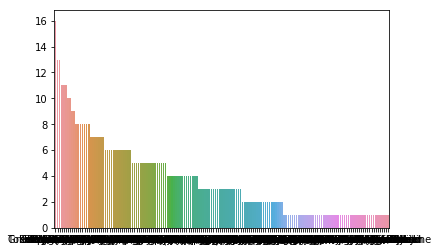

In [241]:

sb.barplot(x=nms, y=aant)